In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load the Data

In [16]:
#we define col names as there are no col names in the dataset file
col_names = ['id','cycle','op_setting_1','op_setting_2','op_setting_3'] + [f's{i}' for i in range(1,22)]

train = pd.read_csv("train_FD001.txt", sep=" ", header=None)
test= pd.read_csv("test_FD001.txt", sep=" ", header=None)
rul = pd.read_csv("RUL_FD001.txt", sep=" ", header=None)

In [17]:
train = train.drop([26, 27], axis=1)
test = test.drop([26, 27], axis=1)
train.columns = col_names
test.columns = col_names

In [18]:
train

,id,cycle,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [19]:
test

,id,cycle,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [20]:
train.shape

(20631, 26)

In [21]:
test.shape

(13096, 26)

In [22]:
rul.shape

(100, 2)

In [23]:
train.isna().sum()

,0
id,0
cycle,0
op_setting_1,0
op_setting_2,0
op_setting_3,0
s1,0
s2,0
s3,0
s4,0
s5,0


In [24]:
test.isna().sum()

,0
id,0
cycle,0
op_setting_1,0
op_setting_2,0
op_setting_3,0
s1,0
s2,0
s3,0
s4,0
s5,0


In [26]:
train.duplicated().sum()

np.int64(0)

In [27]:
test.duplicated().sum()

np.int64(0)

In [ ]:
print("Number of engines in train dataset:", train['id'].nunique())

Number of engines in train dataset: 100


In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


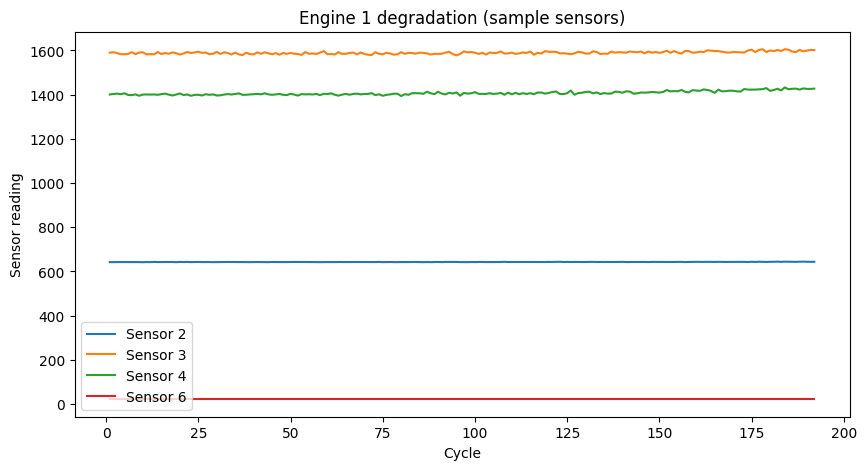

In [ ]:
engine1 = train[train['id']==1]
plt.figure(figsize=(10,5))
plt.plot(engine1['cycle'], engine1['s2'], label='Sensor 2')
plt.plot(engine1['cycle'], engine1['s3'], label='Sensor 3')
plt.plot(engine1['cycle'], engine1['s4'], label='Sensor 4')
plt.plot(engine1['cycle'], engine1['s6'], label='Sensor 6')
plt.xlabel("Cycle")
plt.ylabel("Sensor reading")
plt.title("Engine 1 degradation (sample sensors)")
plt.legend()
plt.show()

In [31]:
#From the description of the dataframe we see some columns who seem to be constant (same min and max values) these wont help us so it is safe to drop them
nunique = train.nunique()
constant_cols = nunique[nunique == 1].index.tolist()
print("Constant sensors:", constant_cols)

Constant sensors: ['op_setting_3', 's1', 's5', 's10', 's16', 's18', 's19']


In [33]:
train = train.drop(constant_cols , axis = 1)
test = test.drop(constant_cols , axis = 1)

In [34]:
train.shape

(20631, 19)

In [35]:
test.shape

(13096, 19)

In [36]:
train['max_cycle'] = train.groupby('id')['cycle'].transform('max')
train['RUL'] = train['max_cycle'] - train['cycle']
train = train.drop('max_cycle', axis=1)
train

,id,cycle,op_setting_1,op_setting_2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [37]:
rul_values=rul[0].values
test['max_cycle'] = test.groupby('id')['cycle'].transform('max')
test_rul = pd.DataFrame({"id": test['id'].unique(), "max_cycle": test.groupby('id')['cycle'].max().values, "truth_RUL": rul_values})

test= test.merge(test_rul, on=['id', 'max_cycle'], how='left')
test['RUL'] = test['truth_RUL'] + (test['max_cycle'] - test['cycle'])
test= test.drop(columns=['max_cycle', 'truth_RUL'])
test


,id,cycle,op_setting_1,op_setting_2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


## Exploratory Plots

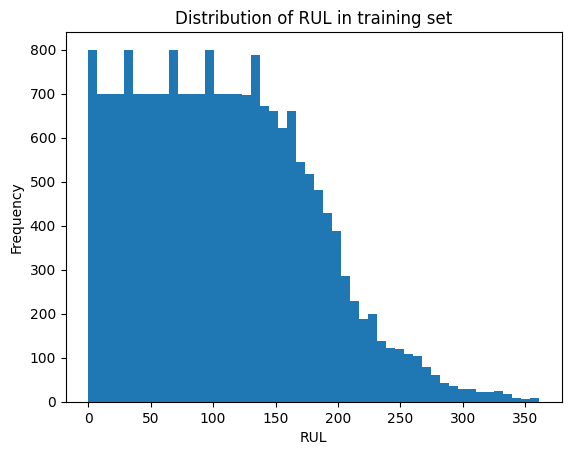

In [39]:
plt.hist(train['RUL'], bins=50)
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.title("Distribution of RUL in training set")
plt.show()

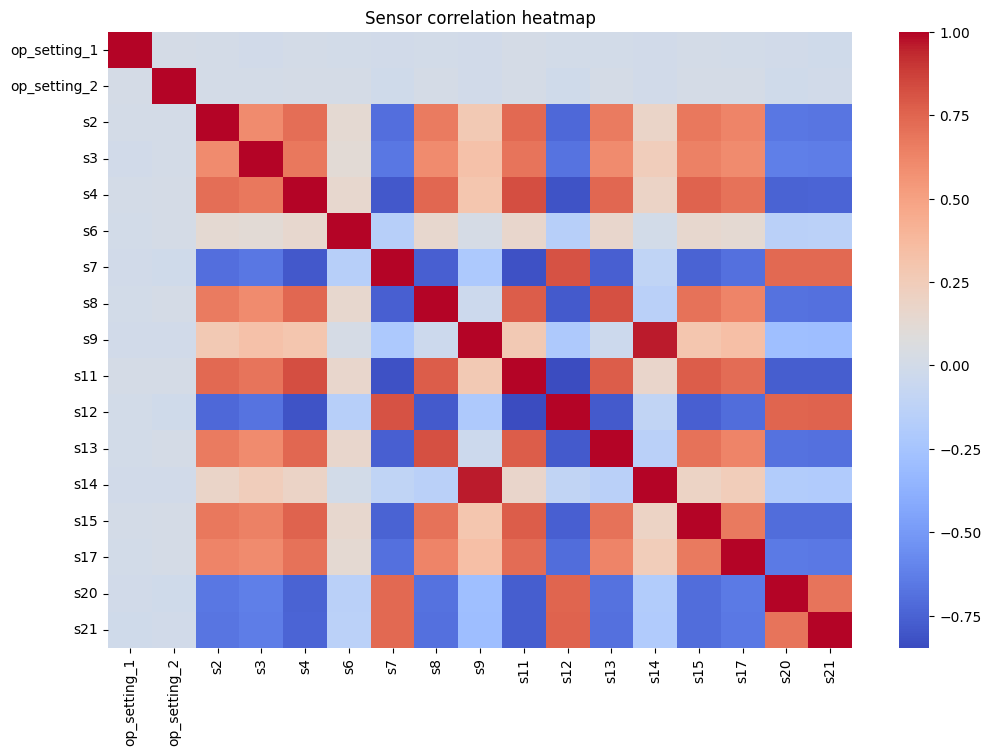

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(train.drop(columns=['id','cycle','RUL']).corr(), cmap="coolwarm")
plt.title("Sensor correlation heatmap")
plt.show()

## Simple Feature engineering

In [41]:
scaler = MinMaxScaler()
sensor_cols = [c for c in train.columns if c not in ['id','cycle','RUL']]

train[sensor_cols] = scaler.fit_transform(train[sensor_cols])
test[sensor_cols] = scaler.transform(test[sensor_cols])

rolling mean with window = 3 (look back 3 cycles each time), smoother and shows actual trends
Rolling standard deviation (std) → measures variability

If it’s high, the engine is unstable

Rolling min/max → captures recent extremes

Rolling sum → cumulative signal in the last N cycles

In [42]:
sensor_cols = [f's{i}' for i in range(1,22)]
useful_sensors = [col for col in sensor_cols if col not in constant_cols]
print("Useful sensors:", useful_sensors)


Useful sensors: ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']


In [43]:
#short term trends
for col in useful_sensors:
    train[col+'_avg5'] = train.groupby('id')[col].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True)
    test[col+'_avg5'] = test.groupby('id')[col].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True)

In [44]:
for col in useful_sensors:
    train[col+'_std5'] = train.groupby('id')[col].rolling(window=5, min_periods=1).std().reset_index(0,drop=True)
    test[col+'_std5'] = test.groupby('id')[col].rolling(window=5, min_periods=1).std().reset_index(0,drop=True)

In [ ]:
#delta features see how fast things change
for col in useful_sensors:
    train[col+'_diff'] = train.groupby('id')[col].diff().fillna(0)
    test[col+'_diff'] = test.groupby('id')[col].diff().fillna(0)

In [45]:
train['cycle_norm'] = train['cycle'] / train.groupby('id')['cycle'].transform('max')
test['cycle_norm']  = test['cycle'] / test.groupby('id')['cycle'].transform('max')